## <font color='Blue'> Analytics Vidhya Dataverse Hack: </font>


## Jobathon - November - 2022

**Build a machine learning/deep learning approach to forecast the total energy demand on an hourly basis for the next 3 years based on past trends.**

### Approach:

* This data is heavy and it contains 95K observations, and it would be difficult to process such huge data with ML algorithms and time consuming.
* I initially thought of working with the ARIMA and SARIMA models, but later decided to go with FB-Prophet because it is something I wanted to learn, and it can handle large amount of data really well.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from prophet import Prophet

In [23]:
df = pd.read_csv('train_IxoE5JN.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [25]:
df.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


* Drop row-id, it is not important for analysis.

In [26]:
df = df.drop(['row_id'],axis=1)

In [9]:
#df.index.freq = 'H'

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  94992 non-null  object 
 1   energy    93092 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [28]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Missing values:

In [29]:
df['energy'].isnull().sum()

1900

In [30]:
df[df['energy'].isnull()].index

Int64Index([   92,   207,   217,   448,   519,   549,   557,   567,   575,
              669,
            ...
            94550, 94554, 94580, 94608, 94666, 94685, 94722, 94737, 94758,
            94857],
           dtype='int64', length=1900)

* #### We can see that the missing values are present throughout the data, right from 2008 to 2018.
* #### We cannot drop these rows, so we will choose interpolate method to fill these values.

In [31]:
df.isnull().sum()

datetime       0
energy      1900
dtype: int64

In [32]:
df['energy'] = df['energy'].interpolate()

In [33]:
df.isnull().sum()

datetime    0
energy      0
dtype: int64

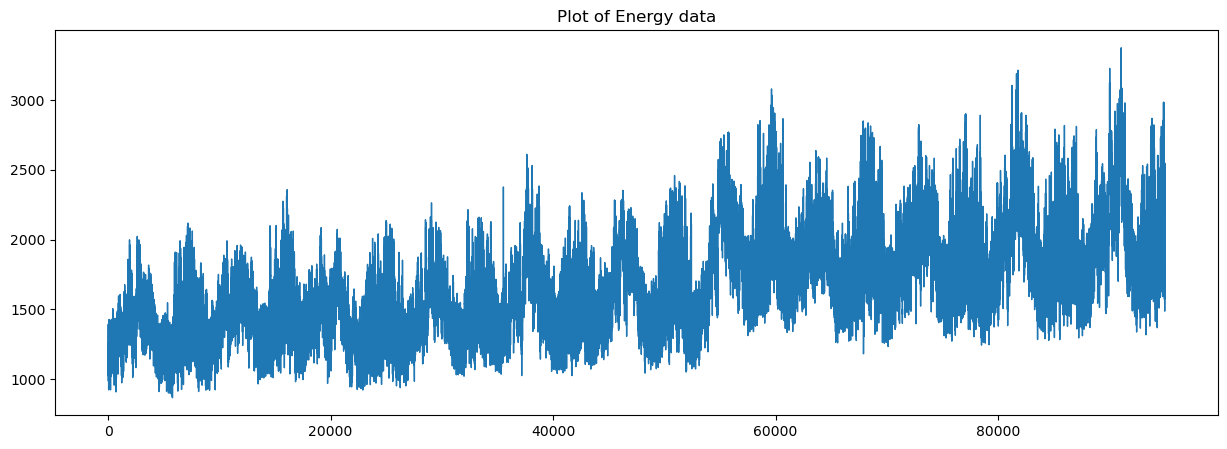

In [34]:
df['energy'].plot(figsize=(15,5),title='Plot of Energy data',lw=1);

There is surely some trend and seasonality component observed in the data.

In [40]:
df.head()

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500


* Fb_prophet needs data in a particular format, we need to preprocess the data.

In [41]:
df.columns = ['ds','y']

In [42]:
df.head()

,ds,y
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500


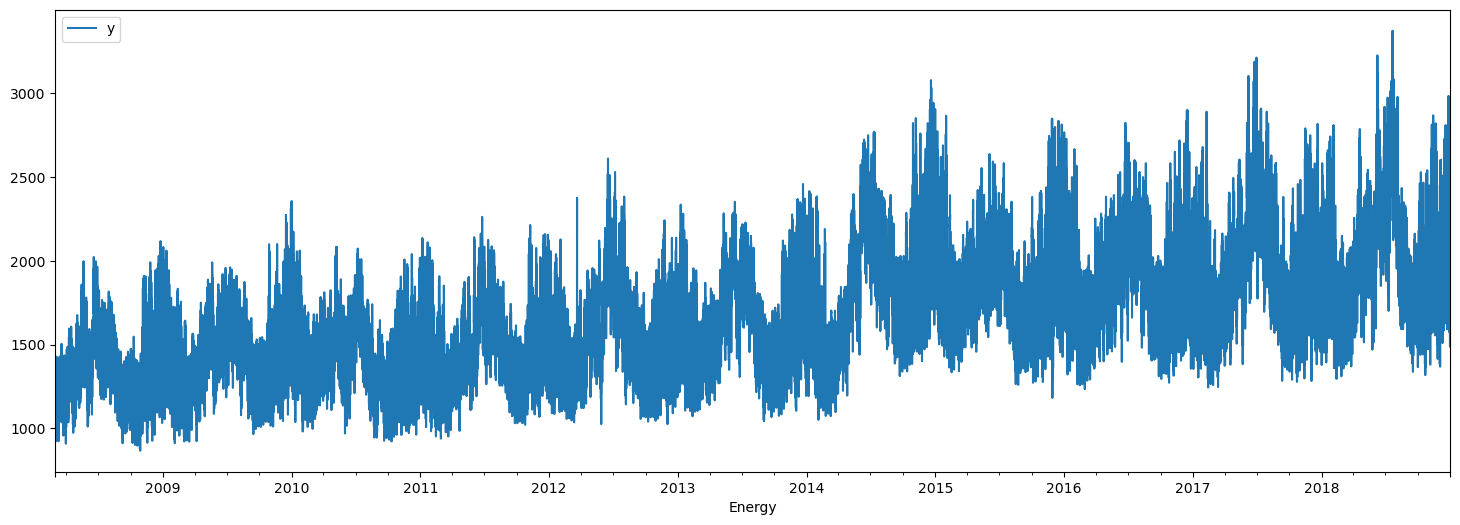

In [50]:
df.plot(x='ds',y='y',figsize=(18,6),xlabel='Energy');

In [46]:
len(df)

94992

In [58]:
24*365*3 + 24

26304

In [60]:
94992-26304

68688

In [59]:
df.iloc[94992-26304]

ds    2016-01-01 00:00:00
y                2002.247
Name: 68688, dtype: object

### Train Test Split:

* To predict next 3 years data, we need to keep test data atleast of 3 years to get good predictions in the future.

In [61]:
df_train = df.iloc[:68688]

In [62]:
df_test = df.iloc[68688:]

In [63]:
df_train.tail()

,ds,y
68683,2015-12-31 19:00:00,2563.1450
68684,2015-12-31 20:00:00,2477.1162
68685,2015-12-31 21:00:00,2384.3664
68686,2015-12-31 22:00:00,2351.4946
68687,2015-12-31 23:00:00,2198.1336


In [65]:
df_test.head()

,ds,y
68688,2016-01-01 00:00:00,2002.2470
68689,2016-01-01 01:00:00,1843.3870
68690,2016-01-01 02:00:00,1735.1178
68691,2016-01-01 03:00:00,1666.1970
68692,2016-01-01 04:00:00,1630.3924


In [71]:
df_test.tail()

,ds,y
94987,2018-12-31 19:00:00,2528.4468
94988,2018-12-31 20:00:00,2461.8836
94989,2018-12-31 21:00:00,2365.9944
94990,2018-12-31 22:00:00,2342.9428
94991,2018-12-31 23:00:00,2180.2176


In [66]:
len(df_train),len(df_test)

(68688, 26304)

In [107]:
model = Prophet()
model.fit(df_train)
future = model.make_future_dataframe(periods=26304,freq='1H')
forecast = model.predict(future)

12:57:08 - cmdstanpy - INFO - Chain [1] start processing
12:58:30 - cmdstanpy - INFO - Chain [1] done processing


In [108]:
len(forecast)

94992

In [109]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
94987,2018-12-31 19:00:00,1588.006515,-4488.962547,7176.571862,-4750.484954,7019.417577,255.428689,255.428689,255.428689,137.936773,...,-94.926130,-94.926130,-94.926130,212.418046,212.418046,212.418046,0.0,0.0,0.0,1843.435204
94988,2018-12-31 20:00:00,1587.995875,-4496.434831,7271.226090,-4750.756013,7019.814180,276.130052,276.130052,276.130052,151.545009,...,-87.709283,-87.709283,-87.709283,212.294326,212.294326,212.294326,0.0,0.0,0.0,1864.125926
94989,2018-12-31 21:00:00,1587.985235,-4523.105397,7331.265802,-4751.027072,7020.210783,270.633741,270.633741,270.633741,138.729098,...,-80.265699,-80.265699,-80.265699,212.170342,212.170342,212.170342,0.0,0.0,0.0,1858.618976
94990,2018-12-31 22:00:00,1587.974595,-4547.173277,7307.469723,-4751.298131,7020.607386,230.059981,230.059981,230.059981,90.652500,...,-72.638618,-72.638618,-72.638618,212.046099,212.046099,212.046099,0.0,0.0,0.0,1818.034576
94991,2018-12-31 23:00:00,1587.963955,-4588.440412,7304.462686,-4751.569190,7021.003990,161.067654,161.067654,161.067654,14.018154,...,-64.872100,-64.872100,-64.872100,211.921599,211.921599,211.921599,0.0,0.0,0.0,1749.031609


## Predictions on the validation data:

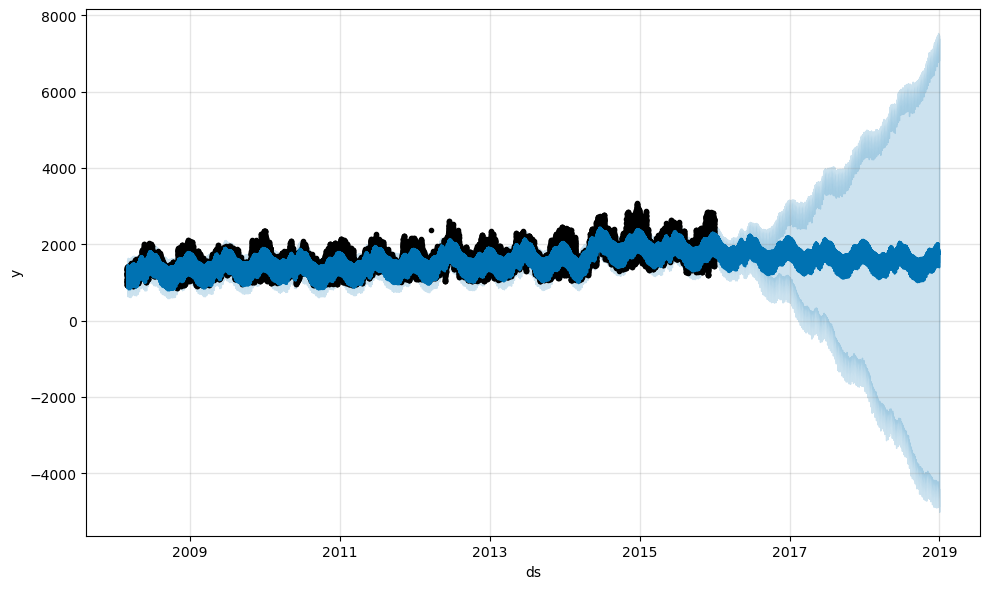

In [112]:
model.plot(forecast);

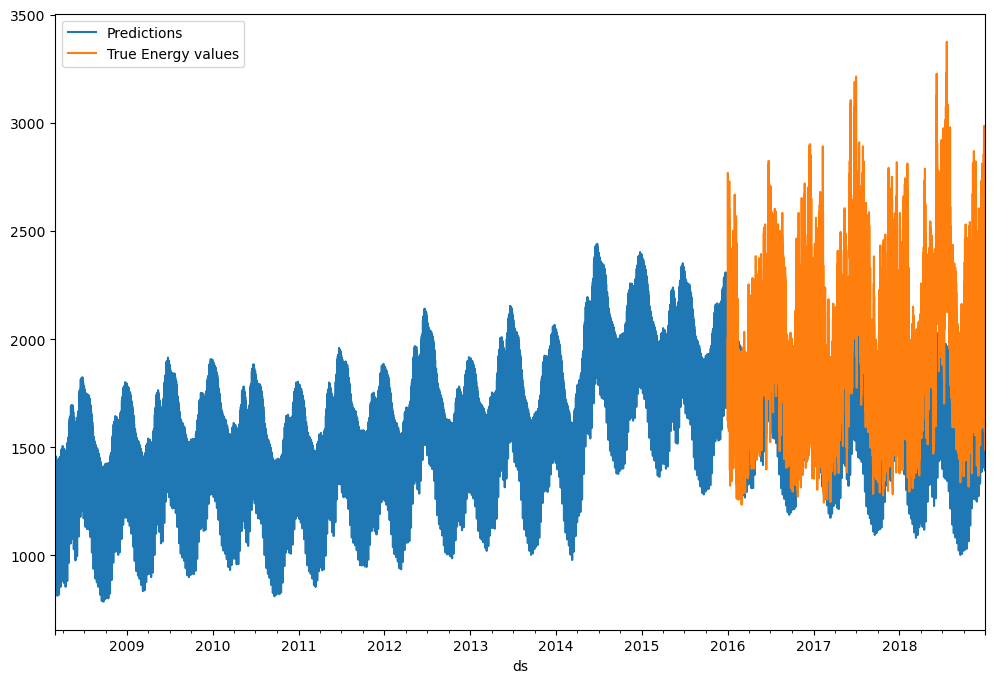

In [110]:
fig = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
df_test.plot(x='ds',y='y',label='True Energy values',legend=True,ax=fig);

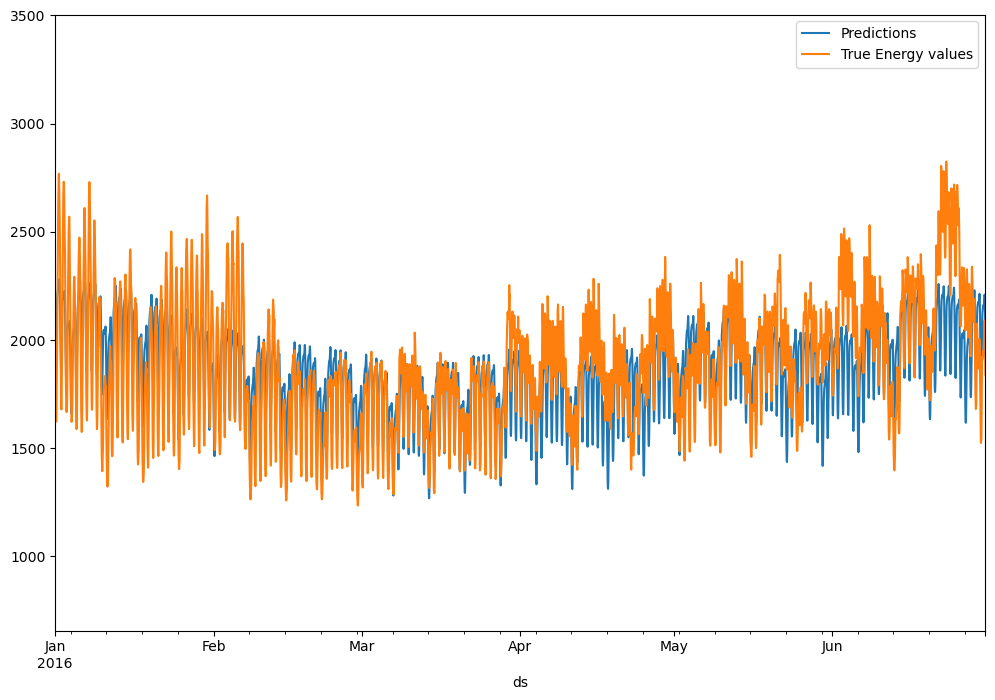

In [115]:
fig = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
df_test.plot(x='ds',y='y',label='True Energy values',legend=True,ax=fig,xlim=('2016-01-01 00:00:00','2016-06-30 23:00:00'));

### Observations:
* We can observe that the model is not performing very well and the predictions are off in many areas.
* But still we can evaluate using the rmse scores to get an idea of the performance.

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [117]:
predictions = forecast.iloc[68688:]['yhat']

In [118]:
len(predictions)

26304

In [119]:
rmse(predictions,df_test['y'])

364.6211533561892

In [120]:
df_test['y'].mean()

1972.7041186052209

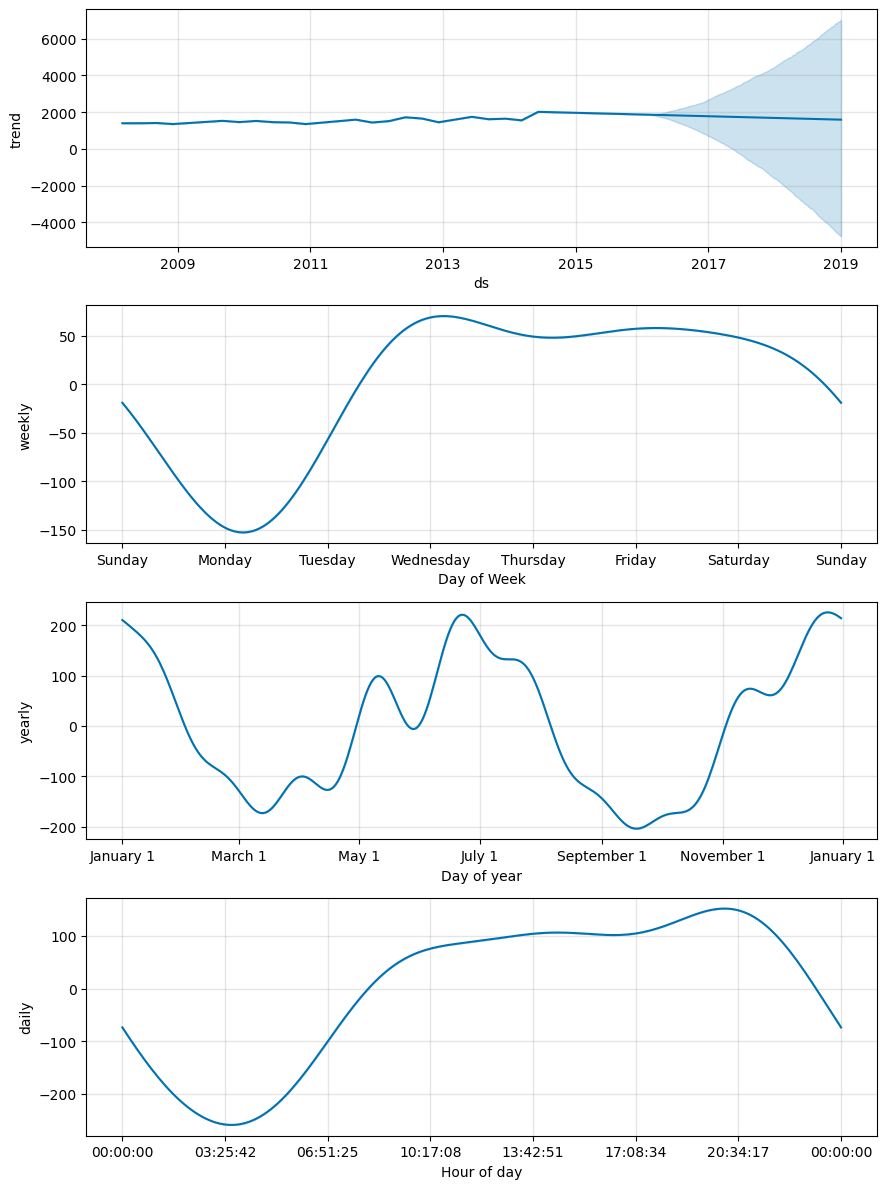

In [121]:
fig2 = model.plot_components(forecast);

### Hyperparameter Tuning using Cross Validation:

In [129]:
import itertools
from prophet.diagnostics import cross_validation,performance_metrics
from statsmodels.tools.eval_measures import rmse

In [131]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],   
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the rmse for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_train)  # Fit model with given params
    df_cv = cross_validation(m,horizon='1095 days',period='365 days',initial='1460 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

13:31:23 - cmdstanpy - INFO - Chain [1] start processing
13:31:51 - cmdstanpy - INFO - Chain [1] done processing
13:32:36 - cmdstanpy - INFO - Chain [1] start processing
13:32:51 - cmdstanpy - INFO - Chain [1] done processing
13:33:41 - cmdstanpy - INFO - Chain [1] start processing
13:34:28 - cmdstanpy - INFO - Chain [1] done processing
13:35:09 - cmdstanpy - INFO - Chain [1] start processing
13:35:27 - cmdstanpy - INFO - Chain [1] done processing
13:36:10 - cmdstanpy - INFO - Chain [1] start processing
13:37:48 - cmdstanpy - INFO - Chain [1] done processing
13:39:06 - cmdstanpy - INFO - Chain [1] start processing
13:40:45 - cmdstanpy - INFO - Chain [1] done processing
13:41:42 - cmdstanpy - INFO - Chain [1] start processing
13:43:41 - cmdstanpy - INFO - Chain [1] done processing
13:44:39 - cmdstanpy - INFO - Chain [1] start processing
13:46:10 - cmdstanpy - INFO - Chain [1] done processing
13:47:20 - cmdstanpy - INFO - Chain [1] start processing
13:49:14 - cmdstanpy - INFO - Chain [1]

In [135]:
tuning_results.sort_values('rmse').head()

,changepoint_prior_scale,seasonality_prior_scale,rmse
3,0.001,10.00,220.821097
2,0.001,1.00,221.002960
0,0.001,0.01,221.113318
1,0.001,0.10,222.223959
7,0.010,10.00,275.965644


In [138]:
all_params[3]

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0}

In [140]:
best_params = all_params[3]

In [141]:
best_params['changepoint_prior_scale']

0.001

In [142]:
model = Prophet(changepoint_prior_scale =best_params['changepoint_prior_scale'],
               seasonality_prior_scale = best_params['seasonality_prior_scale'])
model.fit(df_train)
future = model.make_future_dataframe(periods=26304,freq='1H')
forecast = model.predict(future)

15:43:07 - cmdstanpy - INFO - Chain [1] start processing
15:43:26 - cmdstanpy - INFO - Chain [1] done processing


## Model Performance on the validation set after hyperparameter tuning:

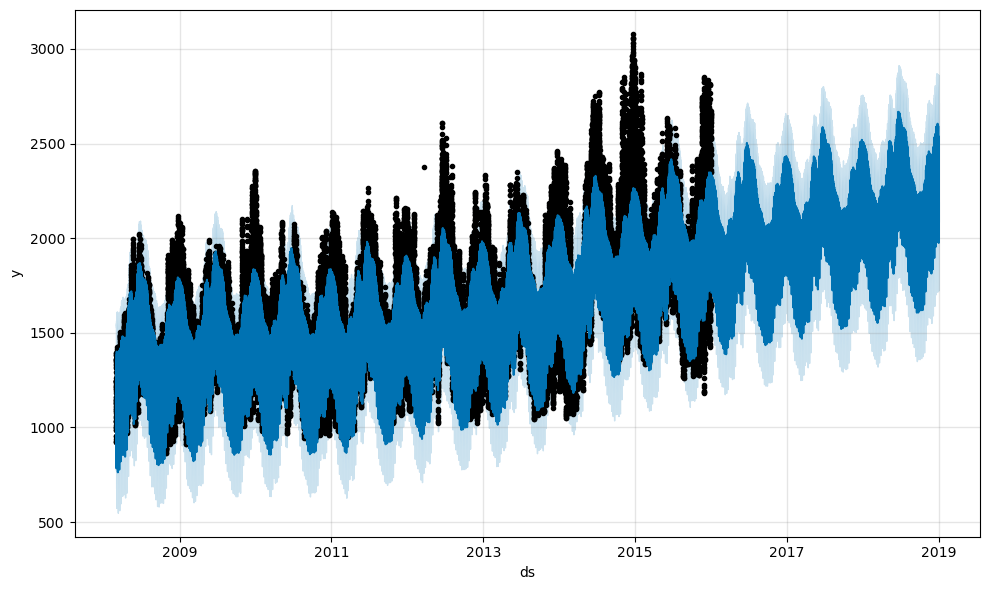

In [143]:
model.plot(forecast);

In [145]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
94987,2018-12-31 19:00:00,2225.297873,2169.466417,2679.591019,2092.315847,2373.813669,201.137971,201.137971,201.137971,137.926545,...,-94.913753,-94.913753,-94.913753,158.125179,158.125179,158.125179,0.0,0.0,0.0,2426.435844
94988,2018-12-31 20:00:00,2225.307536,2192.557088,2710.553804,2092.313675,2373.833034,221.856772,221.856772,221.856772,151.530202,...,-87.698211,-87.698211,-87.698211,158.024782,158.024782,158.024782,0.0,0.0,0.0,2447.164308
94989,2018-12-31 21:00:00,2225.317199,2178.373731,2715.047360,2092.311503,2373.852489,216.379269,216.379269,216.379269,138.711137,...,-80.255977,-80.255977,-80.255977,157.924109,157.924109,157.924109,0.0,0.0,0.0,2441.696467
94990,2018-12-31 22:00:00,2225.326861,2123.385543,2663.266493,2092.309331,2373.877055,175.829922,175.829922,175.829922,90.637049,...,-72.630292,-72.630292,-72.630292,157.823165,157.823165,157.823165,0.0,0.0,0.0,2401.156784
94991,2018-12-31 23:00:00,2225.336524,2085.959069,2590.979038,2092.307159,2373.901622,106.868638,106.868638,106.868638,14.011901,...,-64.865216,-64.865216,-64.865216,157.721953,157.721953,157.721953,0.0,0.0,0.0,2332.205162


In [146]:
predictions_2 = forecast.iloc[68688:]['yhat']

In [147]:
rmse = rmse(predictions_2,df_test['y'])

In [148]:
rmse

252.8903995690262

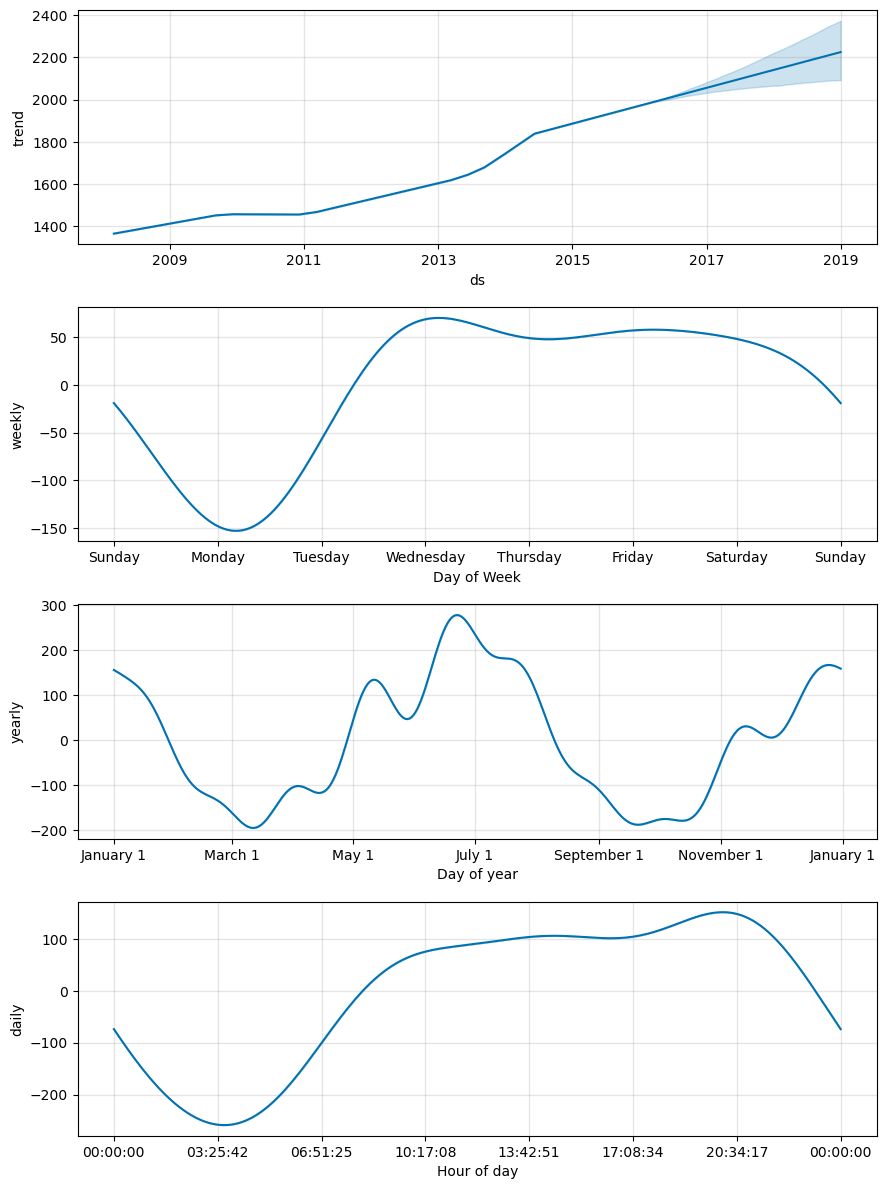

In [149]:
fig3 = model.plot_components(forecast);

### Predictions on Actual Test Data:

Let's predict the unknown:

In [151]:
test = pd.read_csv('test_WudNWDM.csv')

In [152]:
test.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [162]:
final_model = Prophet(changepoint_prior_scale =best_params['changepoint_prior_scale'],
               seasonality_prior_scale = best_params['seasonality_prior_scale'])
final_model.fit(df)
future_test = final_model.make_future_dataframe(periods=26304,freq='1H')
forecast_data = final_model.predict(future_test)

16:02:08 - cmdstanpy - INFO - Chain [1] start processing
16:02:40 - cmdstanpy - INFO - Chain [1] done processing


In [163]:
forecast_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
121291,2021-12-31 19:00:00,2226.474289,2309.560933,2793.480965,2097.816053,2346.746722,320.317042,320.317042,320.317042,145.033641,...,58.991910,58.991910,58.991910,116.291492,116.291492,116.291492,0.0,0.0,0.0,2546.791332
121292,2021-12-31 20:00:00,2226.480700,2293.823621,2818.752415,2097.807644,2346.762851,333.082184,333.082184,333.082184,158.808300,...,58.205515,58.205515,58.205515,116.068369,116.068369,116.068369,0.0,0.0,0.0,2559.562884
121293,2021-12-31 21:00:00,2226.487112,2276.561271,2798.056848,2097.799234,2346.778980,317.343338,317.343338,317.343338,144.135305,...,57.362686,57.362686,57.362686,115.845347,115.845347,115.845347,0.0,0.0,0.0,2543.830449
121294,2021-12-31 22:00:00,2226.493523,2215.469804,2759.457679,2097.790825,2346.795109,264.461136,264.461136,264.461136,92.380085,...,56.458616,56.458616,56.458616,115.622434,115.622434,115.622434,0.0,0.0,0.0,2490.954659
121295,2021-12-31 23:00:00,2226.499934,2141.626234,2672.372953,2097.782416,2346.811237,182.239406,182.239406,182.239406,11.352402,...,55.487363,55.487363,55.487363,115.399641,115.399641,115.399641,0.0,0.0,0.0,2408.739340


In [164]:
test_preds = forecast_data.iloc[94992:]

In [165]:
test_preds.shape

(26304, 22)

In [166]:
len(test)

26304

In [170]:
test_preds.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
94992,2019-01-01 00:00:00,2057.867361,1798.758190,2259.373039,2057.867361,2057.867361,-27.628352,-27.628352,-27.628352,-80.346479,...,-63.796579,-63.796579,-63.796579,116.514707,116.514707,116.514707,0.0,0.0,0.0,2030.239009
94993,2019-01-01 01:00:00,2057.873772,1724.253430,2178.597433,2057.873772,2057.873772,-102.982746,-102.982746,-102.982746,-164.029496,...,-55.244742,-55.244742,-55.244742,116.291492,116.291492,116.291492,0.0,0.0,0.0,1954.891026
94994,2019-01-01 02:00:00,2057.880183,1663.633868,2138.576056,2057.880183,2057.880183,-158.075396,-158.075396,-158.075396,-227.460247,...,-46.683518,-46.683518,-46.683518,116.068369,116.068369,116.068369,0.0,0.0,0.0,1899.804787
94995,2019-01-01 03:00:00,2057.886594,1642.821557,2107.177278,2057.886594,2057.886594,-186.134246,-186.134246,-186.134246,-263.819910,...,-38.159682,-38.159682,-38.159682,115.845347,115.845347,115.845347,0.0,0.0,0.0,1871.752349
94996,2019-01-01 04:00:00,2057.893005,1639.740182,2091.559734,2057.893005,2057.893005,-181.964847,-181.964847,-181.964847,-267.868389,...,-29.718893,-29.718893,-29.718893,115.622434,115.622434,115.622434,0.0,0.0,0.0,1875.928158


In [179]:
test_preds = test_preds.reset_index()

In [181]:
test['energy'] = test_preds['yhat']

In [176]:
test.shape

(26304, 3)

In [182]:
test.head()

,row_id,datetime,energy
0,94993,2019-01-01 00:00:00,2030.239009
1,94994,2019-01-01 01:00:00,1954.891026
2,94995,2019-01-01 02:00:00,1899.804787
3,94996,2019-01-01 03:00:00,1871.752349
4,94997,2019-01-01 04:00:00,1875.928158


In [183]:
test = test.drop('datetime',axis=1)

In [184]:
test.head()

,row_id,energy
0,94993,2030.239009
1,94994,1954.891026
2,94995,1899.804787
3,94996,1871.752349
4,94997,1875.928158


In [185]:
test.to_csv('submission_file_energy.csv',index=False)